Sales Data Analysis Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import openpyxl

In [2]:
sales_data = pd.read_excel("ECOMM_DATA.xlsx")

In [3]:
sales_data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


***Columns in our Dataset***

In [4]:
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

In [5]:
sales_data.shape 

(51290, 24)

In [6]:
sales_data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.570,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.630,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.490,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.160,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.040,Critical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,29002,IN-2014-62366,2014-06-19,2014-06-19,Same Day,KE-16420,Katrina Edelman,Corporate,Kure,Hiroshima,...,OFF-FA-10000746,Office Supplies,Fasteners,"Advantus Thumb Tacks, 12 Pack",65.100,5,0.0,4.5000,0.010,Medium
51286,35398,US-2014-102288,2014-06-20,2014-06-24,Standard Class,ZC-21910,Zuschuss Carroll,Consumer,Houston,Texas,...,OFF-AP-10002906,Office Supplies,Appliances,Hoover Replacement Belt for Commercial Guardsm...,0.444,1,0.8,-1.1100,0.010,Medium
51287,40470,US-2013-155768,2013-12-02,2013-12-02,Same Day,LB-16795,Laurel Beltran,Home Office,Oxnard,California,...,OFF-EN-10001219,Office Supplies,Envelopes,"#10- 4 1/8"" x 9 1/2"" Security-Tint Envelopes",22.920,3,0.0,11.2308,0.010,High
51288,9596,MX-2012-140767,2012-02-18,2012-02-22,Standard Class,RB-19795,Ross Baird,Home Office,Valinhos,São Paulo,...,OFF-BI-10000806,Office Supplies,Binders,"Acco Index Tab, Economy",13.440,2,0.0,2.4000,0.003,Medium


**Information about Dataset**

In [7]:
sales_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

***numeric values of data***

In [8]:
sales_data.describe() 

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit,Shipping Cost
count,51290.00000,51290,51290,9994.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,55190.379428,246.490581,3.476545,0.142908,28.610982,26.375818
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000,0.002000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,23223.000000,30.758625,2.000000,0.000000,0.000000,2.610000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,56430.500000,85.053000,3.000000,0.000000,9.240000,7.790000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,90008.000000,251.053200,5.000000,0.200000,36.810000,24.450000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,99301.000000,22638.480000,14.000000,0.850000,8399.976000,933.570000
std,14806.29199,NaN,NaN,32063.693350,487.565361,2.278766,0.212280,174.340972,57.296810


**Checking any missing values in Dataset**

In [9]:
sales_data.isna().any()

Row ID            False
Order ID          False
Order Date        False
Ship Date         False
Ship Mode         False
Customer ID       False
Customer Name     False
Segment           False
City              False
State             False
Country           False
Postal Code        True
Market            False
Region            False
Product ID        False
Category          False
Sub-Category      False
Product Name      False
Sales             False
Quantity          False
Discount          False
Profit            False
Shipping Cost     False
Order Priority    False
dtype: bool

**we have Postal Code column with 41296 missing values**

In [10]:
sales_data.isna().sum() 

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [11]:
sales_data['Postal Code']

0        10024.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285        NaN
51286    77095.0
51287    93030.0
51288        NaN
51289        NaN
Name: Postal Code, Length: 51290, dtype: float64

In [12]:
sales_data['Postal Code'].unique()

array([10024.,    nan, 95823., 28027., 22304., 42420., 60610., 90008.,
       79109., 93727., 10009., 27217., 55407., 92646., 98115., 32303.,
       23223., 30318., 49201., 19134., 89015., 98105.,  8701., 90045.,
       48205., 22801., 19120.,  2149., 92037., 53711., 90805., 10035.,
       77036., 10701., 73071., 43130., 28205., 89031., 90049., 19711.,
        2908., 11561., 94122., 43229., 90032., 48227., 23464.,  7960.,
       94110., 43055., 41042., 65807., 47905., 35810., 31907., 78207.,
       14701., 46203., 48234., 53132., 68104., 92704., 36608., 22153.,
       18018., 98226.,  2920., 70506., 60623., 44052., 84043., 98103.,
       65203., 75007., 10011., 90004., 77095., 30328., 44105., 78664.,
       76106.,  3820., 32216., 94521., 30076., 45373., 19140., 85323.,
       45014.,  1852., 80219., 21044., 46060., 92804., 27604.,  2886.,
       60653., 48911., 92374., 94601.,  5408., 74403., 23320., 98198.,
       53209., 19143., 93101., 14609., 91776., 45231., 13601., 28314.,
      

In [13]:

postal_codes = sales_data['Postal Code']
try:
    postal_codes_numeric = pd.to_numeric(postal_codes)
    print("Conversion to numeric format successful.")
except ValueError as e:
    print("Error encountered during conversion to numeric format:")
    print(e)


Conversion to numeric format successful.


In [14]:
sales_data['Postal Code'] = pd.to_numeric(sales_data['Postal Code'])


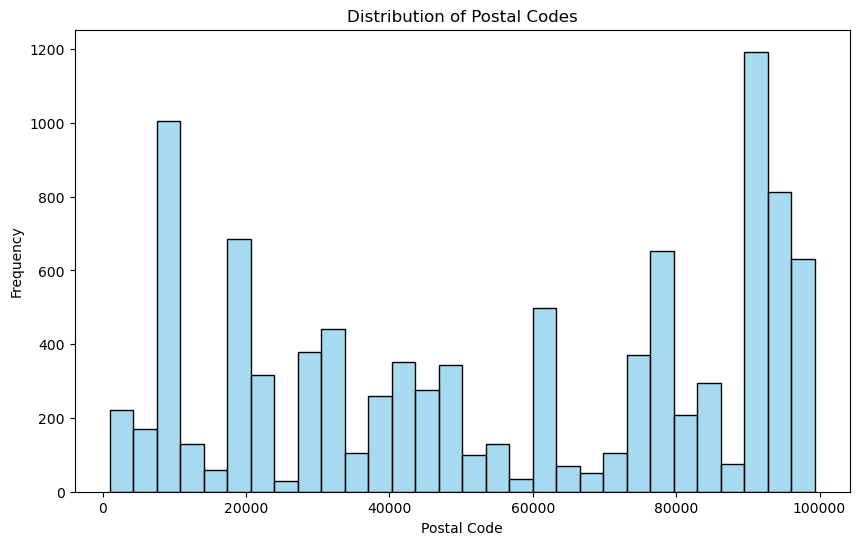

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(postal_codes, bins=30, color='skyblue')
plt.xlabel('Postal Code')
plt.ylabel('Frequency')
plt.title('Distribution of Postal Codes')
plt.show()

In [16]:
sales_data['Postal Code']

0        10024.0
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
51285        NaN
51286    77095.0
51287    93030.0
51288        NaN
51289        NaN
Name: Postal Code, Length: 51290, dtype: float64

In [17]:
mode_postal_code = sales_data['Postal Code'].mode()[0]
sales_data['Postal Code'].fillna(mode_postal_code, inplace=True)


In [18]:
sales_data['Postal Code'].isna().sum()

0

**Checking all columns in sales_Data**

**Row ID column**

In [19]:
sales_data['Row ID']

0        32298
1        26341
2        25330
3        13524
4        47221
         ...  
51285    29002
51286    35398
51287    40470
51288     9596
51289     6147
Name: Row ID, Length: 51290, dtype: int64

In [20]:
print(sales_data['Row ID'].unique())
print(sales_data['Row ID'].nunique())

[32298 26341 25330 ... 40470  9596  6147]
51290


**Order_ID column**

In [21]:
sales_data['Order ID'].dtype

dtype('O')

In [22]:
sales_data['Order ID']

0         CA-2012-124891
1          IN-2013-77878
2          IN-2013-71249
3        ES-2013-1579342
4           SG-2013-4320
              ...       
51285      IN-2014-62366
51286     US-2014-102288
51287     US-2013-155768
51288     MX-2012-140767
51289     MX-2012-134460
Name: Order ID, Length: 51290, dtype: object

In [23]:
print(sales_data['Order ID'].unique())
print(sales_data['Order ID'].nunique())

['CA-2012-124891' 'IN-2013-77878' 'IN-2013-71249' ... 'IN-2014-72327'
 'IN-2014-57662' 'MX-2012-134460']
25035


**Order_ID Column - (Graphical Representation)**

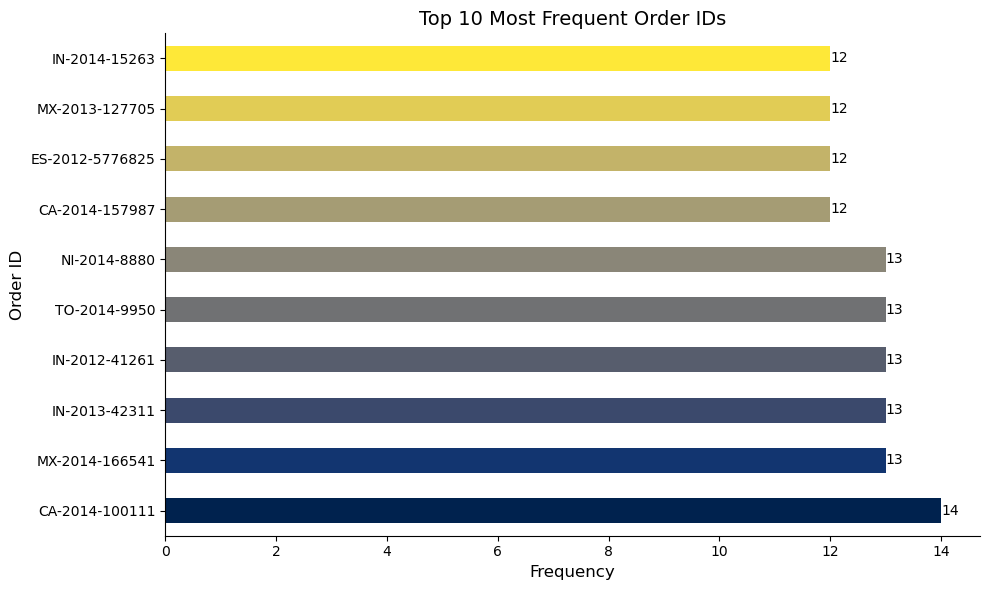

In [24]:
top_order_ids = sales_data['Order ID'].value_counts().head(10)

plt.figure(figsize=(10, 6))
colors = plt.cm.cividis_r(np.linspace(0, 1, 10))  
top_order_ids.sort_values().plot(kind='barh', color=colors)

plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Order ID', fontsize=12)
plt.title('Top 10 Most Frequent Order IDs', fontsize=14)

for index, value in enumerate(top_order_ids.sort_values()):
    plt.text(value, index, str(value), va='center', ha='left', fontsize=10, color='black')

plt.gca().invert_yaxis()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)


plt.tight_layout()
plt.show()



**Order Date Column**

In [25]:
sales_data['Order Date']

0       2012-07-31
1       2013-02-05
2       2013-10-17
3       2013-01-28
4       2013-11-05
           ...    
51285   2014-06-19
51286   2014-06-20
51287   2013-12-02
51288   2012-02-18
51289   2012-05-22
Name: Order Date, Length: 51290, dtype: datetime64[ns]

In [26]:
print(sales_data['Order Date'].unique())
print(sales_data['Order Date'].nunique())

<DatetimeArray>
['2012-07-31 00:00:00', '2013-02-05 00:00:00', '2013-10-17 00:00:00',
 '2013-01-28 00:00:00', '2013-11-05 00:00:00', '2013-06-28 00:00:00',
 '2011-11-07 00:00:00', '2012-04-14 00:00:00', '2014-10-14 00:00:00',
 '2012-01-28 00:00:00',
 ...
 '2014-01-12 00:00:00', '2012-07-29 00:00:00', '2012-07-15 00:00:00',
 '2012-08-19 00:00:00', '2011-03-27 00:00:00', '2011-06-12 00:00:00',
 '2012-07-08 00:00:00', '2013-07-07 00:00:00', '2012-05-27 00:00:00',
 '2011-02-06 00:00:00']
Length: 1430, dtype: datetime64[ns]
1430


C:\Users\manoj\AppData\Local\Temp\ipykernel_10200\1144673308.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sales_data['Order Date'], color='skyblue', shade=True)


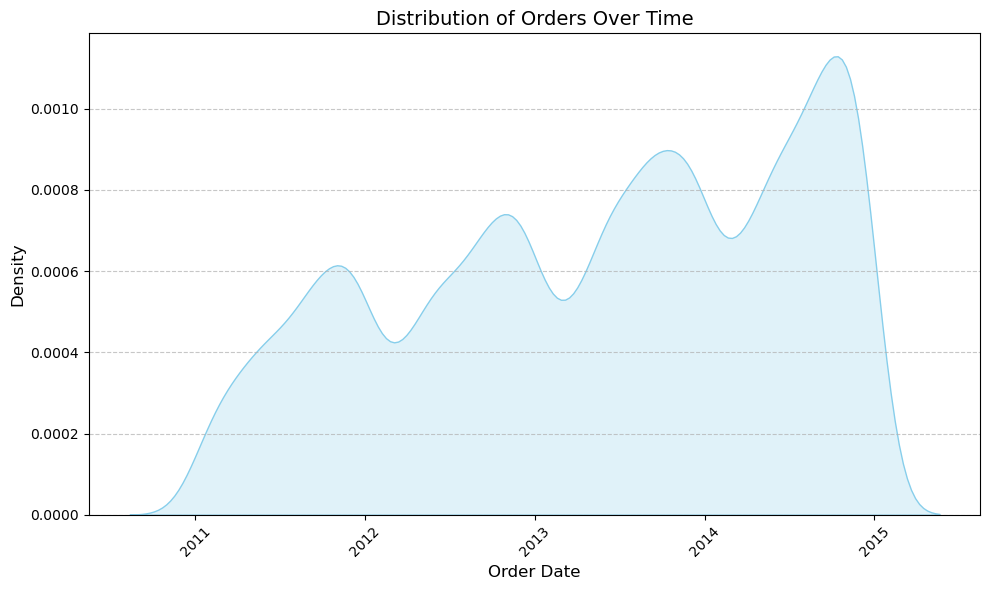

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(sales_data['Order Date'], color='skyblue', shade=True)
plt.xlabel('Order Date', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Distribution of Orders Over Time', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Ship Date Column**

In [28]:
sales_data['Ship Date']

0       2012-07-31
1       2013-02-07
2       2013-10-18
3       2013-01-30
4       2013-11-06
           ...    
51285   2014-06-19
51286   2014-06-24
51287   2013-12-02
51288   2012-02-22
51289   2012-05-26
Name: Ship Date, Length: 51290, dtype: datetime64[ns]

In [29]:
print(sales_data['Ship Date'].unique())
print(sales_data['Ship Date'].nunique())

<DatetimeArray>
['2012-07-31 00:00:00', '2013-02-07 00:00:00', '2013-10-18 00:00:00',
 '2013-01-30 00:00:00', '2013-11-06 00:00:00', '2013-07-01 00:00:00',
 '2011-11-09 00:00:00', '2012-04-18 00:00:00', '2014-10-21 00:00:00',
 '2012-01-31 00:00:00',
 ...
 '2011-07-11 00:00:00', '2011-02-23 00:00:00', '2011-01-25 00:00:00',
 '2015-01-07 00:00:00', '2011-02-08 00:00:00', '2012-01-24 00:00:00',
 '2012-02-15 00:00:00', '2012-07-23 00:00:00', '2012-04-08 00:00:00',
 '2011-01-05 00:00:00']
Length: 1464, dtype: datetime64[ns]
1464


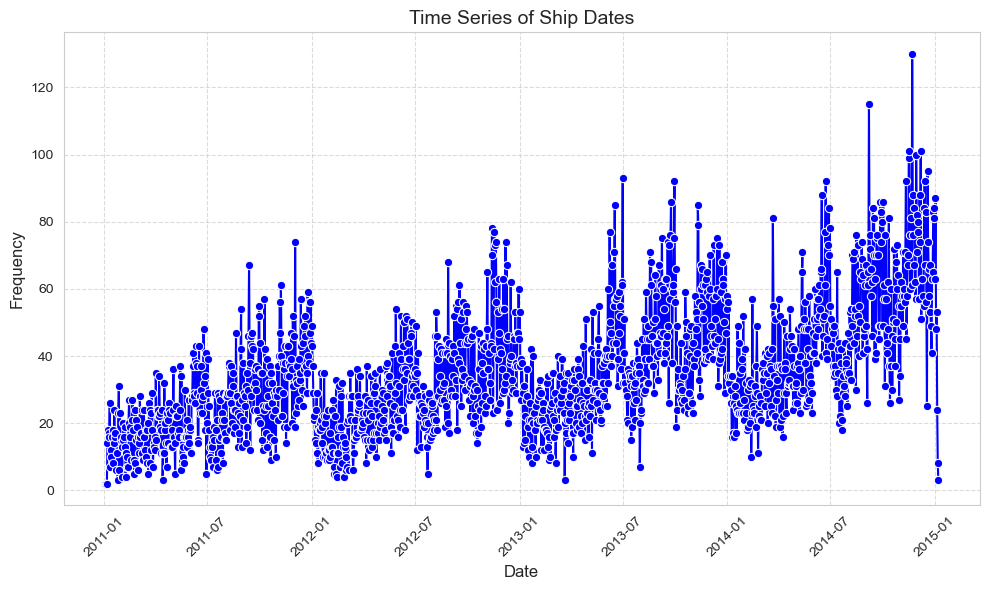

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_data['Ship Date'].value_counts().sort_index(), marker='o', color='blue')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Time Series of Ship Dates', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Ship Mode column**

In [31]:
sales_data['Ship Mode']

0              Same Day
1          Second Class
2           First Class
3           First Class
4              Same Day
              ...      
51285          Same Day
51286    Standard Class
51287          Same Day
51288    Standard Class
51289      Second Class
Name: Ship Mode, Length: 51290, dtype: object

In [32]:
print(sales_data['Ship Mode'].unique())
print(sales_data['Ship Mode'].nunique())

['Same Day' 'Second Class' 'First Class' 'Standard Class']
4


C:\Users\manoj\AppData\Local\Temp\ipykernel_10200\3848630841.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ship_mode_counts.index, y=ship_mode_counts.values, palette="Blues_d")


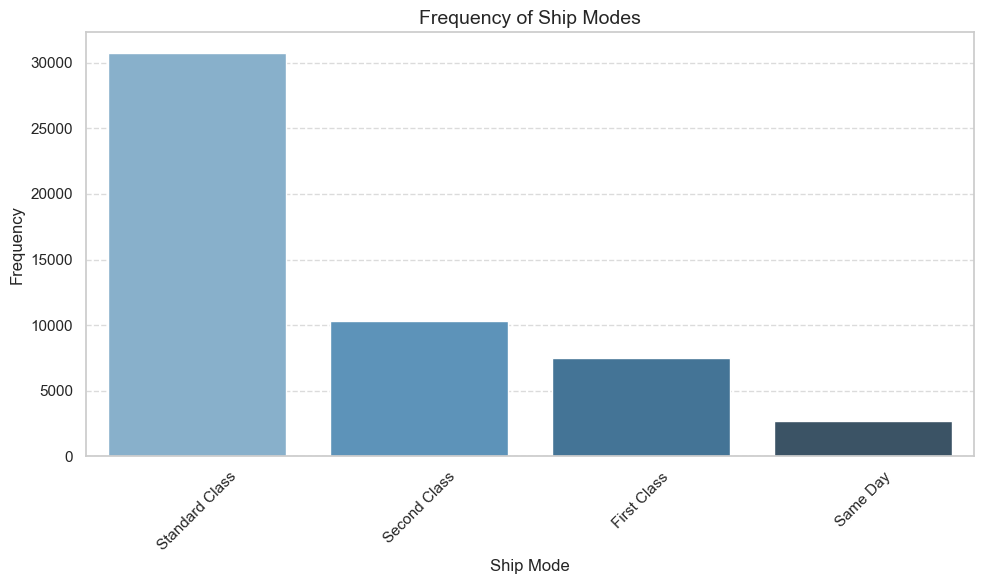

In [33]:
sns.set(style="whitegrid")
ship_mode_counts = sales_data['Ship Mode'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=ship_mode_counts.index, y=ship_mode_counts.values, palette="Blues_d")
plt.title('Frequency of Ship Modes', fontsize=14)
plt.xlabel('Ship Mode', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**Customer ID column**

In [34]:
sales_data['Customer ID']

0        RH-19495
1        JR-16210
2        CR-12730
3        KM-16375
4         RH-9495
           ...   
51285    KE-16420
51286    ZC-21910
51287    LB-16795
51288    RB-19795
51289    MC-18100
Name: Customer ID, Length: 51290, dtype: object

In [35]:
print(sales_data['Customer ID'].unique())
print(sales_data['Customer ID'].nunique())

['RH-19495' 'JR-16210' 'CR-12730' ... 'RC-9825' 'MG-7890' 'ZC-11910']
1590


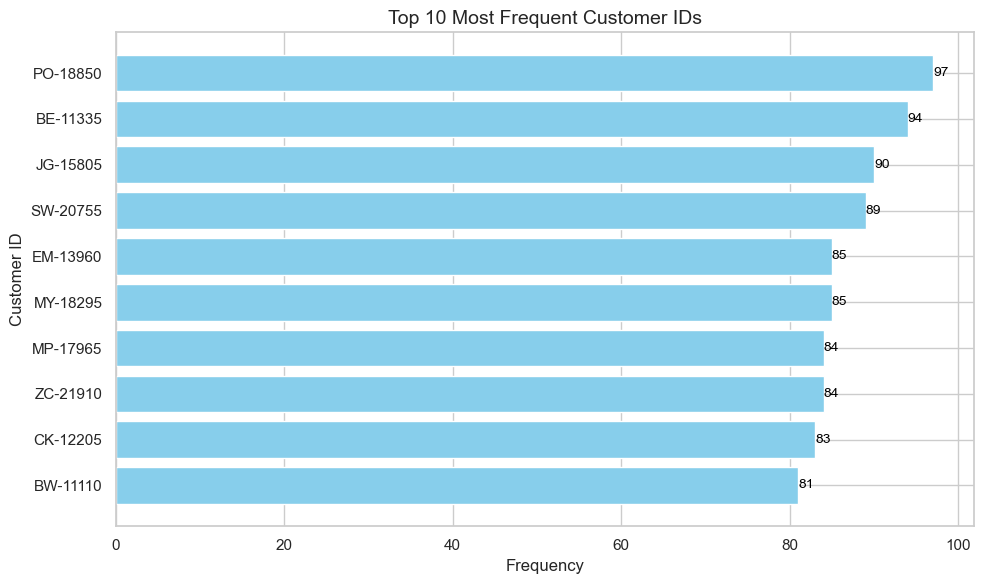

In [36]:
customer_id_counts = sales_data['Customer ID'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(customer_id_counts.index, customer_id_counts.values, color='skyblue')
plt.title('Top 10 Most Frequent Customer IDs', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Customer ID', fontsize=12)

for index, value in enumerate(customer_id_counts.values):
    plt.text(value, index, str(value), ha="left", va='center', fontsize=10, color='black')

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


**Customer Name Column**

In [37]:
sales_data['Customer Name']

0             Rick Hansen
1           Justin Ritter
2            Craig Reiter
3        Katherine Murray
4             Rick Hansen
               ...       
51285     Katrina Edelman
51286    Zuschuss Carroll
51287      Laurel Beltran
51288          Ross Baird
51289       Mick Crebagga
Name: Customer Name, Length: 51290, dtype: object

In [38]:
print(sales_data['Customer Name'].unique())
print(sales_data['Customer Name'].nunique())  

['Rick Hansen' 'Justin Ritter' 'Craig Reiter' 'Katherine Murray'
 'Jim Mitchum' 'Toby Swindell' 'Mick Brown' 'Jane Waco' 'Joseph Holt'
 'Greg Maxwell' 'Anthony Jacobs' 'Magdelene Morse' 'Vicky Freymann'
 'Peter Fuller' 'Ben Peterman' 'Thomas Boland' 'Patrick Jones' 'Jim Sink'
 'Ritsa Hightower' 'Ann Blume' 'Sue Ann Reed' 'Jason Klamczynski'
 'Laurel Beltran' 'Naresj Patel' 'Valerie Dominguez' 'Phillip Breyer'
 'Eugene Barchas' 'Karen Ferguson' 'Benjamin Patterson' 'Rick Reed'
 'Bill Shonely' 'Joel Eaton' 'Dave Poirier' 'Nora Preis' 'Aaron Hawkins'
 'Darrin Martin' 'Grant Thornton' "Patrick O'Donnell" 'Dan Lawera'
 'Joy Bell-' 'Barry Franz' 'Vivek Grady' 'Greg Tran' 'Zuschuss Carroll'
 'Sanjit Chand' 'Ellis Ballard' 'Arthur Prichep' 'Scott Williamson'
 'John Huston' 'Lena Creighton' 'Trudy Glocke' 'Harold Ryan'
 'Deirdre Greer' 'Sheri Gordon' 'Fred Hopkins' 'Guy Phonely'
 'Mitch Webber' "Patrick O'Brill" 'Chuck Sachs' 'Keith Dawkins'
 'Michael Stewart' 'Kimberly Carter' 'Denny Blanton' 

In [39]:
!pip install squarify

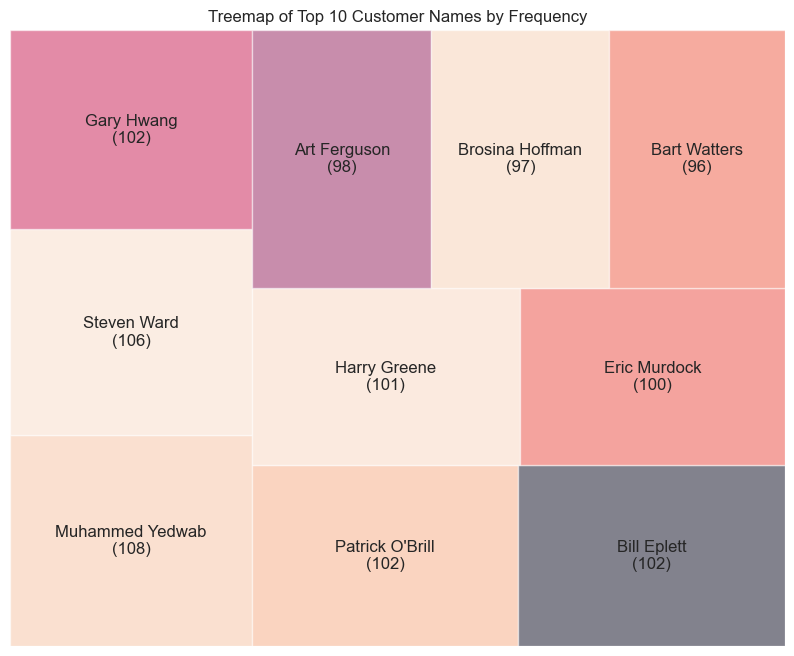

In [40]:
import squarify
customer_name_counts = sales_data['Customer Name'].value_counts()
top_10_customers = customer_name_counts.head(10)
labels = [f'{name}\n({count})' for name, count in zip(top_10_customers.index, top_10_customers.values)]
plt.figure(figsize=(10, 8))
squarify.plot(sizes=top_10_customers.values, label=labels, alpha=0.5)
plt.axis('off')
plt.title('Treemap of Top 10 Customer Names by Frequency')
plt.show()

**Segment column**

In [41]:
sales_data['Segment']

0           Consumer
1          Corporate
2           Consumer
3        Home Office
4           Consumer
            ...     
51285      Corporate
51286       Consumer
51287    Home Office
51288    Home Office
51289       Consumer
Name: Segment, Length: 51290, dtype: object

In [42]:
print(sales_data['Segment'].unique())
print(sales_data['Segment'].nunique())

['Consumer' 'Corporate' 'Home Office']
3


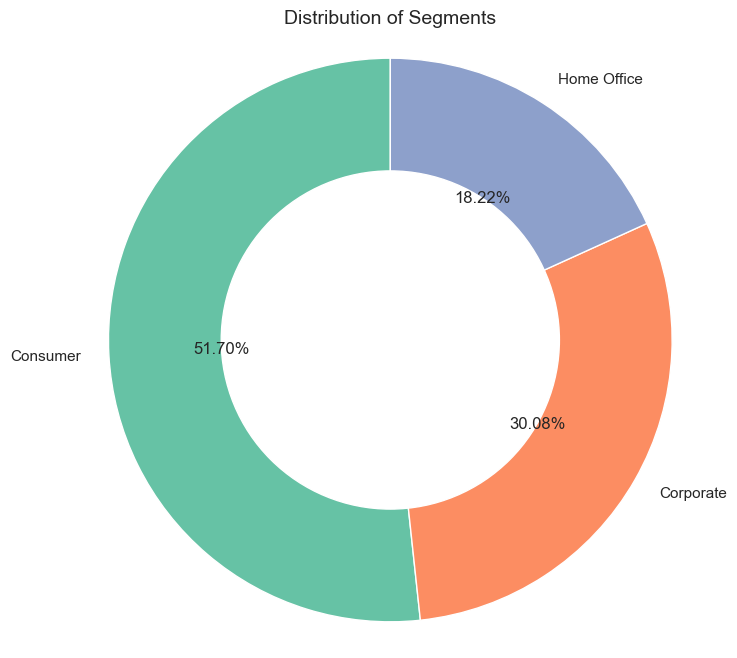

In [43]:
segment_counts = sales_data['Segment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(x=segment_counts, labels=segment_counts.index, autopct='%1.2f%%', startangle=90, colors=sns.color_palette('Set2'))
circle = plt.Circle((0, 0), 0.6, color='white')
plt.gca().add_artist(circle)
plt.title('Distribution of Segments', fontsize=14)
plt.axis('equal')
plt.show()



***City column ***

In [44]:
sales_data['City']

0        New York City
1           Wollongong
2             Brisbane
3               Berlin
4                Dakar
             ...      
51285             Kure
51286          Houston
51287           Oxnard
51288         Valinhos
51289         Tipitapa
Name: City, Length: 51290, dtype: object

In [45]:
print(sales_data['City'].unique())
print(sales_data['City'].nunique())

['New York City' 'Wollongong' 'Brisbane' ... 'Abilene' 'Felahiye'
 'Victoria Falls']
3636


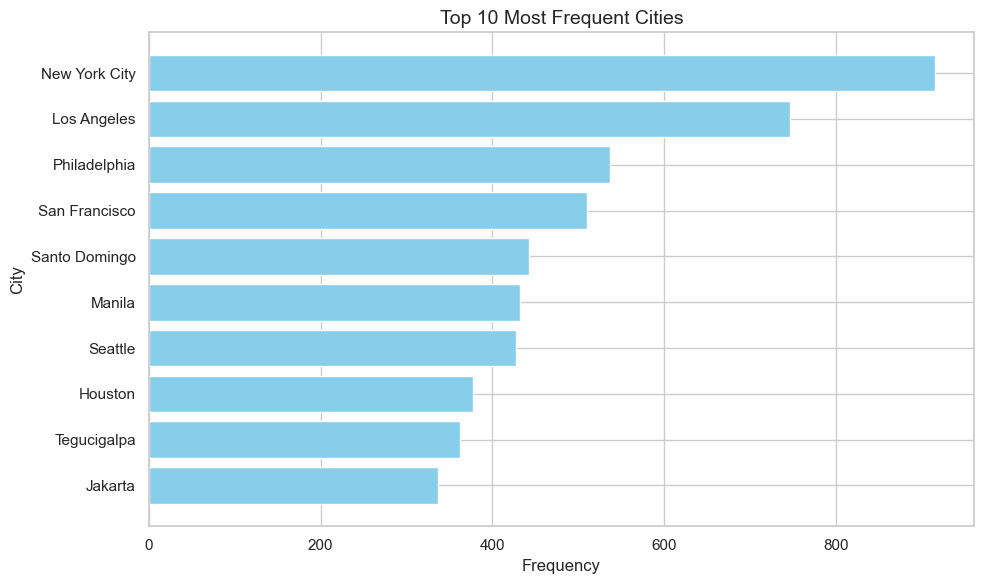

In [46]:
city_counts = sales_data['City'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(city_counts.index, city_counts.values, color='skyblue')  # Change color to 'skyblue' or any other valid color
plt.title('Top 10 Most Frequent Cities', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('City', fontsize=12)
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()



**State coluumn**

In [47]:
sales_data['State']

0               New York
1        New South Wales
2             Queensland
3                 Berlin
4                  Dakar
              ...       
51285          Hiroshima
51286              Texas
51287         California
51288          São Paulo
51289            Managua
Name: State, Length: 51290, dtype: object

In [48]:
print(sales_data['State'].unique())
print(sales_data['State'].nunique())

['New York' 'New South Wales' 'Queensland' ... 'Manicaland' 'Kabarole'
 'Matabeleland North']
1094


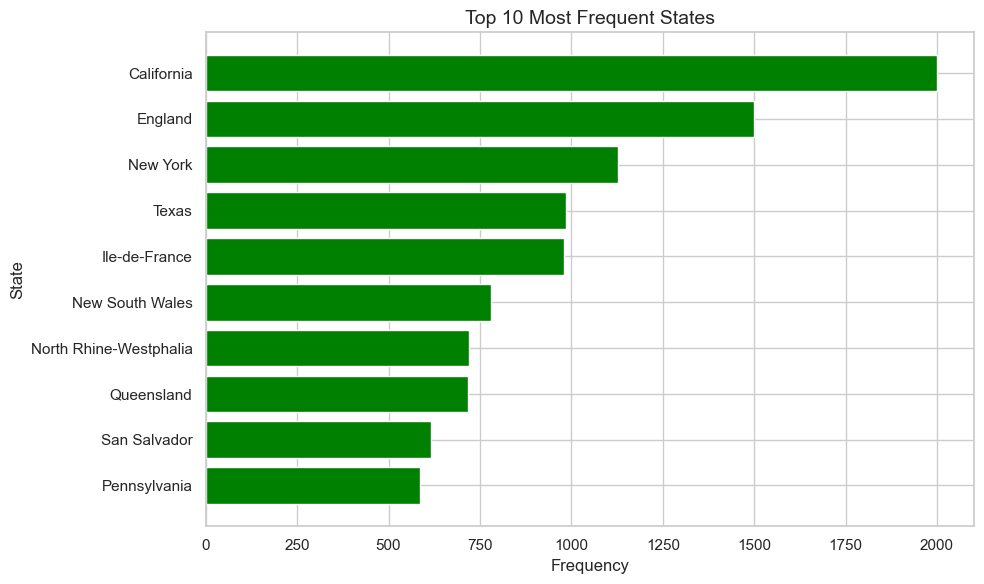

In [49]:
state_counts = sales_data['State'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.barh(state_counts.index, state_counts.values, color='green')  
plt.title('Top 10 Most Frequent States', fontsize=14)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


**Country column**

In [50]:
sales_data['Country']

0        United States
1            Australia
2            Australia
3              Germany
4              Senegal
             ...      
51285            Japan
51286    United States
51287    United States
51288           Brazil
51289        Nicaragua
Name: Country, Length: 51290, dtype: object

In [51]:
print(sales_data['Country'].unique())
print(sales_data['Country'].nunique())

['United States' 'Australia' 'Germany' 'Senegal' 'New Zealand'
 'Afghanistan' 'Saudi Arabia' 'Brazil' 'China' 'France' 'Italy' 'Tanzania'
 'Poland' 'United Kingdom' 'Mexico' 'El Salvador' 'Taiwan' 'India'
 'Dominican Republic' 'Democratic Republic of the Congo' 'Indonesia'
 'Uruguay' 'Iran' 'Mozambique' 'Bangladesh' 'Spain' 'Ukraine' 'Nicaragua'
 'Morocco' 'Canada' 'Philippines' 'Austria' 'Colombia' 'Netherlands'
 'Malaysia' 'Ecuador' 'Thailand' 'Somalia' 'Guatemala' 'Belarus'
 'Cambodia' 'South Africa' 'Japan' 'Russia' 'Egypt' 'Azerbaijan'
 'Lithuania' 'Argentina' 'Lesotho' 'Vietnam' 'Cuba' 'Romania' 'Turkey'
 'Cameroon' 'Hungary' 'Singapore' 'Angola' 'Belgium' 'Pakistan' 'Finland'
 'Ghana' 'Zambia' 'Iraq' 'Liberia' 'Georgia' 'Switzerland' 'Albania'
 'Chad' 'Montenegro' 'Namibia' 'Portugal' 'Madagascar' 'Sweden'
 'Myanmar (Burma)' 'Jamaica' 'Qatar' 'Republic of the Congo' 'Norway'
 'Algeria' 'South Korea' 'Nigeria' 'Estonia' "Cote d'Ivoire" 'Honduras'
 'Paraguay' 'Czech Republic' 'Cen

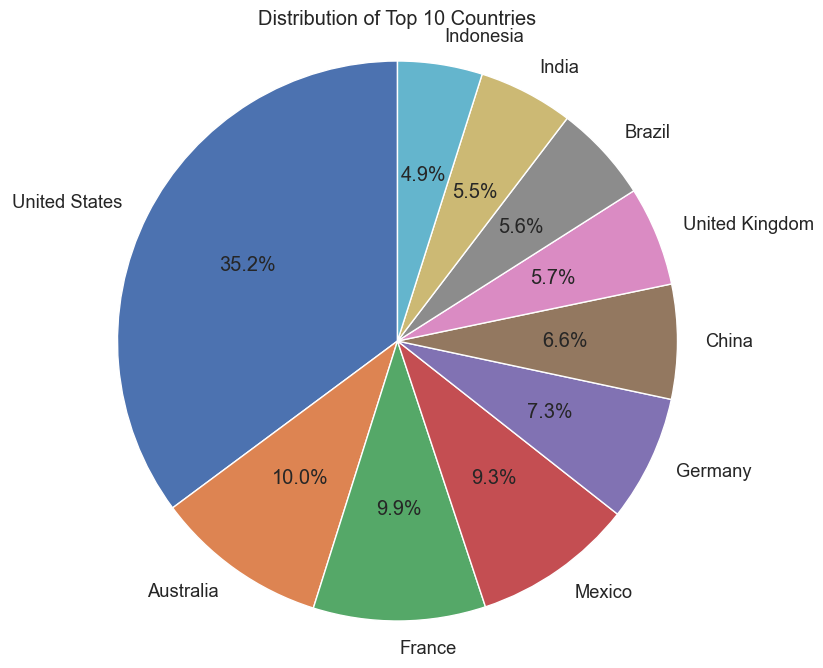

In [52]:
country_counts = sales_data['Country'].value_counts().head(10)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.color_palette("tab10")
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Top 10 Countries')
plt.axis('equal')  
plt.show()



**Market Column**

In [53]:
sales_data['Market']

0            US
1          APAC
2          APAC
3            EU
4        Africa
          ...  
51285      APAC
51286        US
51287        US
51288     LATAM
51289     LATAM
Name: Market, Length: 51290, dtype: object

In [54]:
print(sales_data['Market'].unique())
print(sales_data['Market'].nunique())

['US' 'APAC' 'EU' 'Africa' 'EMEA' 'LATAM' 'Canada']
7


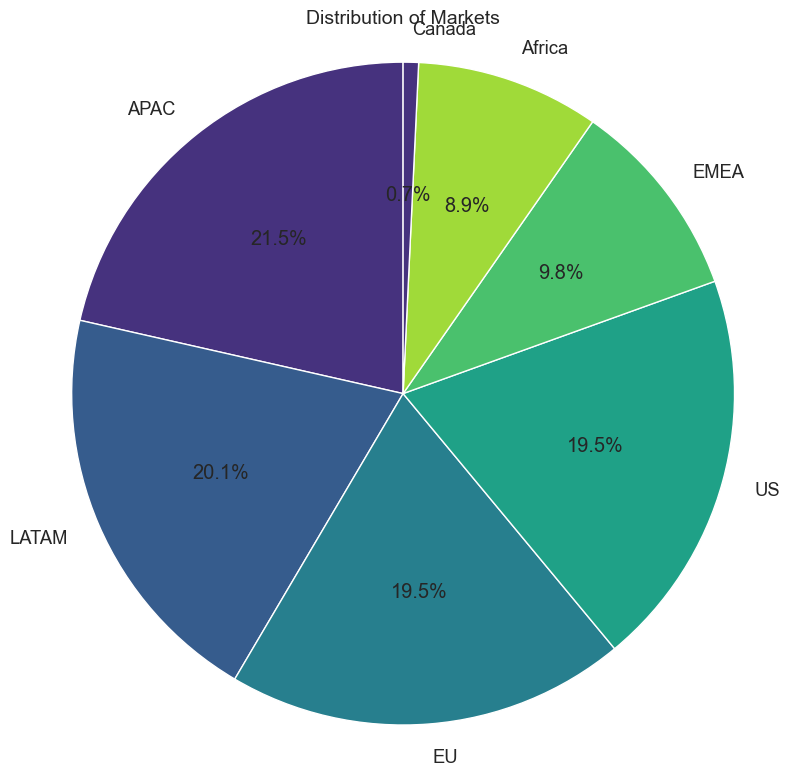

In [55]:
market_counts = sales_data['Market'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(x=market_counts, labels=market_counts.index, colors=sns.color_palette('viridis'), startangle=90, autopct='%1.1f%%')
plt.title('Distribution of Markets', fontsize=14)
plt.axis('equal') 
plt.tight_layout()
plt.show()


**Region Column**

In [56]:
sales_data['Region']

0              East
1           Oceania
2           Oceania
3           Central
4            Africa
            ...    
51285    North Asia
51286       Central
51287          West
51288         South
51289       Central
Name: Region, Length: 51290, dtype: object

In [57]:
print(sales_data['Region'].unique())
print(sales_data['Region'].nunique())

['East' 'Oceania' 'Central' 'Africa' 'West' 'South' 'Central Asia' 'EMEA'
 'North Asia' 'North' 'Caribbean' 'Southeast Asia' 'Canada']
13


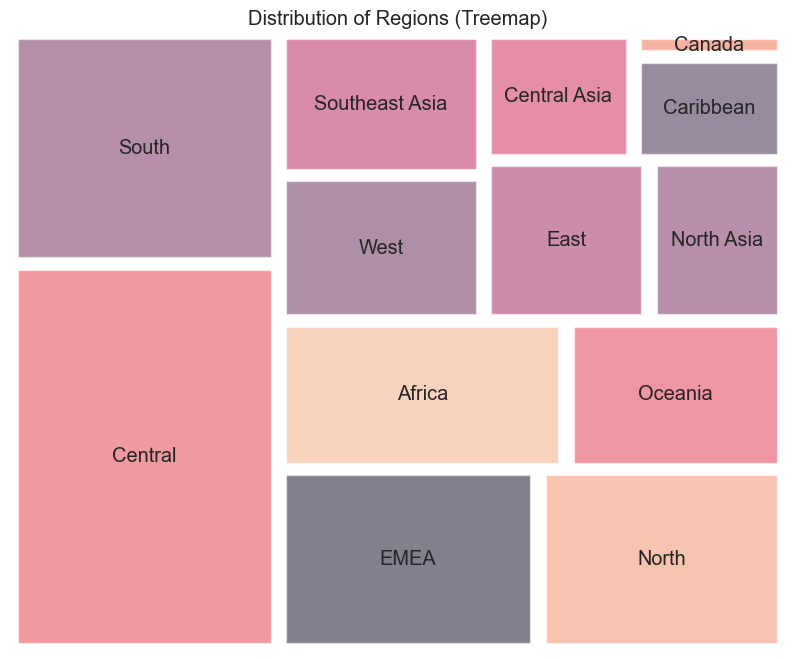

In [58]:
region_counts = sales_data['Region'].value_counts()
plt.figure(figsize=(10, 8))
squarify.plot(sizes=region_counts, label=region_counts.index, alpha=0.5, pad=True)
plt.title('Distribution of Regions (Treemap)')
plt.axis('off') 
plt.show()

***Product ID Column ***

In [59]:
sales_data['Product ID']

0         TEC-AC-10003033
1         FUR-CH-10003950
2         TEC-PH-10004664
3         TEC-PH-10004583
4        TEC-SHA-10000501
               ...       
51285     OFF-FA-10000746
51286     OFF-AP-10002906
51287     OFF-EN-10001219
51288     OFF-BI-10000806
51289     OFF-PA-10004155
Name: Product ID, Length: 51290, dtype: object

In [60]:
print(sales_data['Product ID'].unique())
print(sales_data['Product ID'].nunique())

['TEC-AC-10003033' 'FUR-CH-10003950' 'TEC-PH-10004664' ...
 'OFF-BI-10002510' 'FUR-ADV-10002329' 'OFF-AP-10002203']
10292


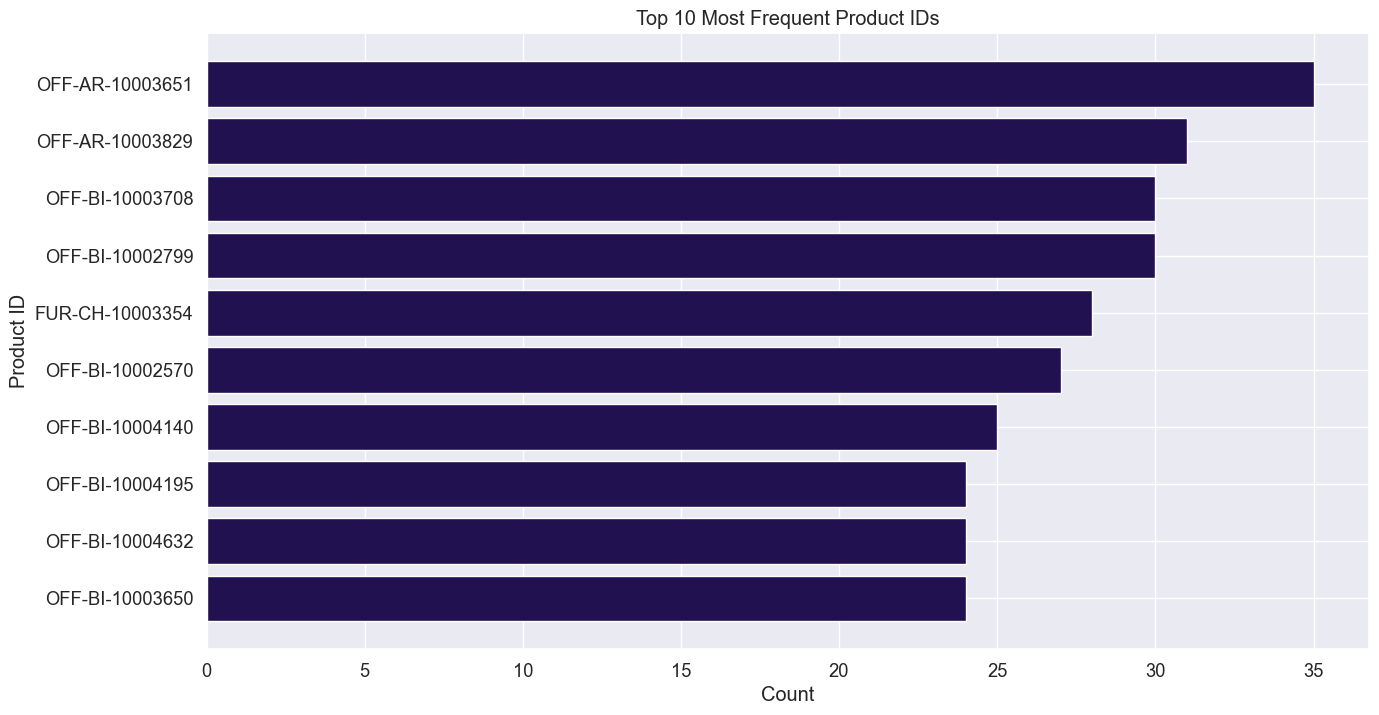

In [61]:
top_n = 10
top_product_ids = sales_data['Product ID'].value_counts().head(top_n)
product_counts = top_product_ids.values
product_ids = top_product_ids.index

sns.set_palette("magma")
plt.figure(figsize=(15, 8))
plt.barh(product_ids, product_counts)
plt.xlabel('Count')
plt.ylabel('Product ID')
plt.title(f'Top {top_n} Most Frequent Product IDs')
plt.gca().invert_yaxis()  
plt.show()

**Category column**

In [62]:
sales_data['Category']

0             Technology
1              Furniture
2             Technology
3             Technology
4             Technology
              ...       
51285    Office Supplies
51286    Office Supplies
51287    Office Supplies
51288    Office Supplies
51289    Office Supplies
Name: Category, Length: 51290, dtype: object

In [63]:
print(sales_data['Category'].unique())
print(sales_data['Category'].nunique())

['Technology' 'Furniture' 'Office Supplies']
3


**Sub-Category Column**

In [64]:
sales_data['Sub-Category']

0        Accessories
1             Chairs
2             Phones
3             Phones
4            Copiers
            ...     
51285      Fasteners
51286     Appliances
51287      Envelopes
51288        Binders
51289          Paper
Name: Sub-Category, Length: 51290, dtype: object

In [65]:
print(sales_data['Sub-Category'].unique())
print(sales_data['Sub-Category'].nunique())

['Accessories' 'Chairs' 'Phones' 'Copiers' 'Tables' 'Binders' 'Supplies'
 'Appliances' 'Machines' 'Bookcases' 'Storage' 'Furnishings' 'Art' 'Paper'
 'Envelopes' 'Fasteners' 'Labels']
17


C:\Users\manoj\AppData\Local\Temp\ipykernel_10200\2423765043.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette='magma')


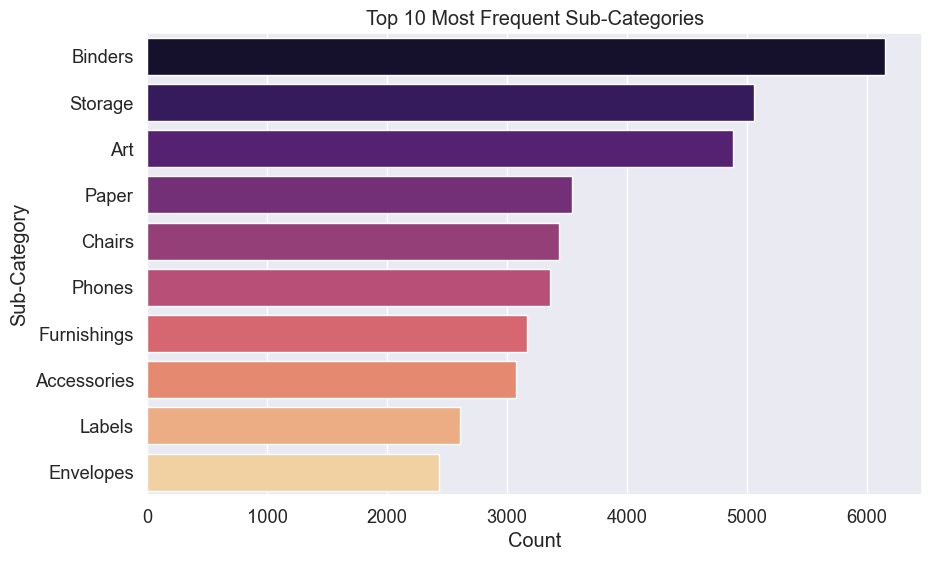

In [66]:
top_subcategories = sales_data['Sub-Category'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_subcategories.values, y=top_subcategories.index, palette='magma')
plt.xlabel('Count')
plt.ylabel('Sub-Category')
plt.title('Top 10 Most Frequent Sub-Categories')
plt.show()

**Product name**

In [67]:
sales_data['Product Name']

0        Plantronics CS510 - Over-the-Head monaural Wir...
1                Novimex Executive Leather Armchair, Black
2                        Nokia Smart Phone, with Caller ID
3                           Motorola Smart Phone, Cordless
4                           Sharp Wireless Fax, High-Speed
                               ...                        
51285                        Advantus Thumb Tacks, 12 Pack
51286    Hoover Replacement Belt for Commercial Guardsm...
51287         #10- 4 1/8" x 9 1/2" Security-Tint Envelopes
51288                              Acco Index Tab, Economy
51289              Eaton Computer Printout Paper, 8.5 x 11
Name: Product Name, Length: 51290, dtype: object

In [68]:
print(sales_data['Product Name'].unique())
print(sales_data['Product Name'].nunique())

['Plantronics CS510 - Over-the-Head monaural Wireless Headset System'
 'Novimex Executive Leather Armchair, Black'
 'Nokia Smart Phone, with Caller ID' ...
 'Kleencut Forged Office Shears by Acme United Corporation'
 'Holmes Visible Mist Ultrasonic Humidifier with 2.3-Gallon Output per Day, Replacement Filter'
 'Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac']
3788


C:\Users\manoj\AppData\Local\Temp\ipykernel_10200\3293073169.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_names.values, y=top_product_names.index, palette='plasma')


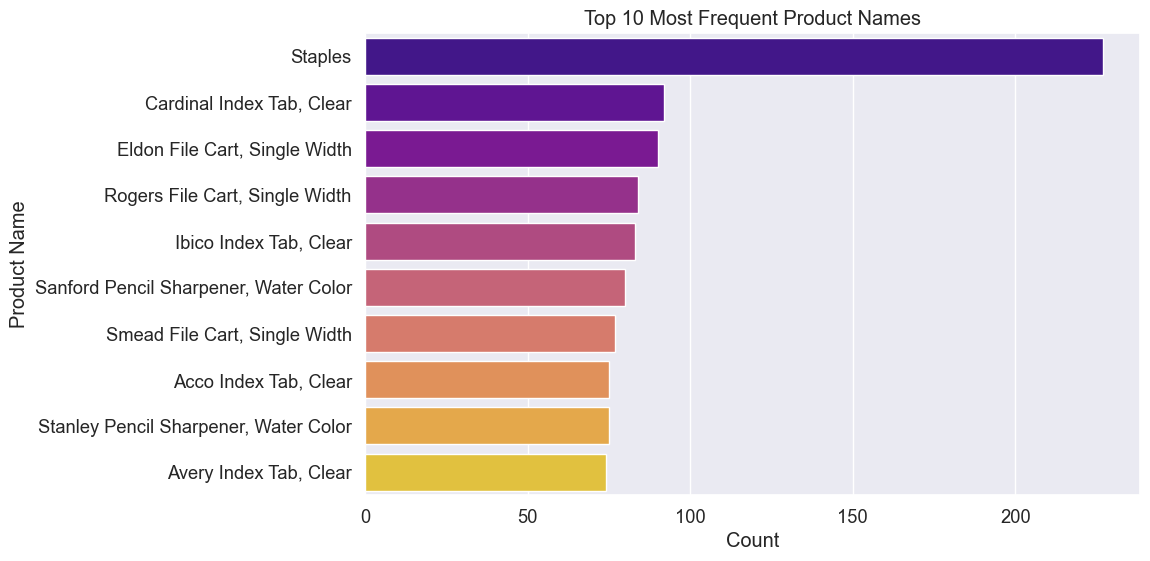

In [69]:
top_product_names = sales_data['Product Name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_product_names.values, y=top_product_names.index, palette='plasma')
plt.xlabel('Count')
plt.ylabel('Product Name')
plt.title('Top 10 Most Frequent Product Names')
plt.show()

**Sales Column**

In [70]:
sales_data['Sales']

0        2309.650
1        3709.395
2        5175.171
3        2892.510
4        2832.960
           ...   
51285      65.100
51286       0.444
51287      22.920
51288      13.440
51289      61.380
Name: Sales, Length: 51290, dtype: float64

In [71]:
print(sales_data['Sales'].unique())
print(sales_data['Sales'].nunique())

[2.309650e+03 3.709395e+03 5.175171e+03 ... 1.624000e+00 5.364000e+00
 4.440000e-01]
24988


**Qunatity column**

In [72]:
sales_data['Quantity']

0        7
1        9
2        9
3        5
4        8
        ..
51285    5
51286    1
51287    3
51288    2
51289    3
Name: Quantity, Length: 51290, dtype: int64

In [73]:
print(sales_data['Quantity'].unique())
print(sales_data['Quantity'].nunique())

[ 7  9  5  8  4  6 13 12 14 10  2 11  3  1]
14


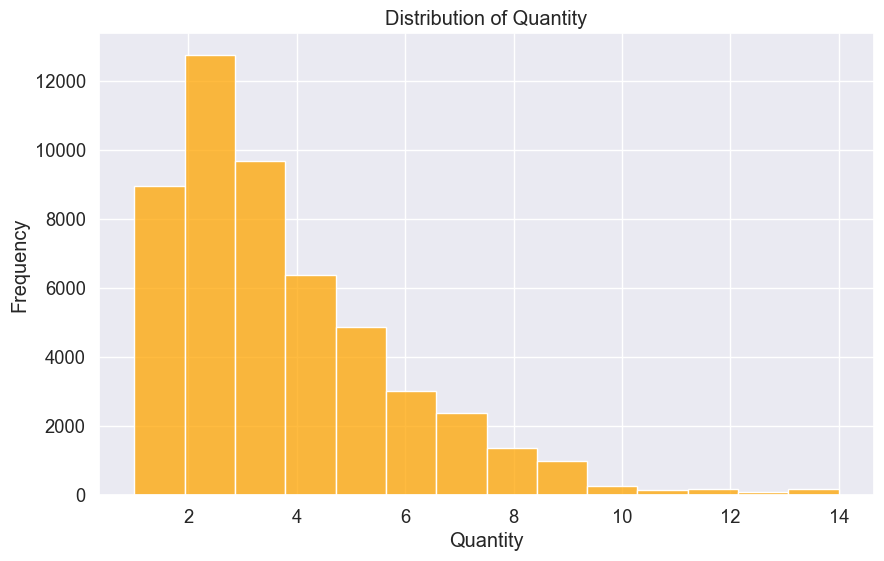

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(sales_data['Quantity'], bins=14, color='orange')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Quantity')
plt.grid(True)
plt.show()

***Discount ***

In [75]:
sales_data['Discount']

0        0.0
1        0.1
2        0.1
3        0.1
4        0.0
        ... 
51285    0.0
51286    0.8
51287    0.0
51288    0.0
51289    0.0
Name: Discount, Length: 51290, dtype: float64

In [76]:
print(sales_data['Discount'].unique())
print(sales_data['Discount'].nunique())

[0.    0.1   0.2   0.4   0.15  0.3   0.5   0.17  0.47  0.25  0.002 0.07
 0.32  0.27  0.7   0.35  0.6   0.65  0.8   0.57  0.37  0.402 0.55  0.202
 0.45  0.602 0.85 ]
27


C:\Users\manoj\AppData\Local\Temp\ipykernel_10200\3888575298.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(sales_data['Discount'], shade=True, color='skyblue')


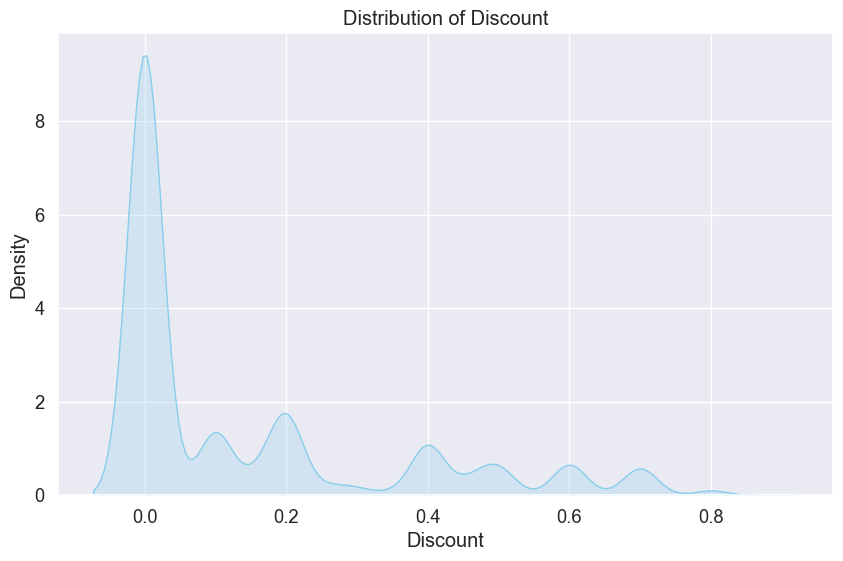

In [77]:
plt.figure(figsize=(10, 6))
sns.kdeplot(sales_data['Discount'], shade=True, color='skyblue')
plt.xlabel('Discount')
plt.ylabel('Density')
plt.title('Distribution of Discount')
plt.grid(True)
plt.show()

***Profit column ***

In [78]:
sales_data['Profit']

0        762.1845
1       -288.7650
2        919.9710
3        -96.5400
4        311.5200
           ...   
51285      4.5000
51286     -1.1100
51287     11.2308
51288      2.4000
51289      1.8000
Name: Profit, Length: 51290, dtype: float64

In [79]:
print(sales_data['Profit'].unique())
print(sales_data['Profit'].nunique())

[ 762.1845 -288.765   919.971  ...   -4.466    -6.456   -49.572 ]
27085


**Shipping Cost**

In [80]:
sales_data['Shipping Cost']

0        933.570
1        923.630
2        915.490
3        910.160
4        903.040
          ...   
51285      0.010
51286      0.010
51287      0.010
51288      0.003
51289      0.002
Name: Shipping Cost, Length: 51290, dtype: float64

In [81]:
print(sales_data['Shipping Cost'].unique())
print(sales_data['Shipping Cost'].nunique())

[9.3357e+02 9.2363e+02 9.1549e+02 ... 1.0000e-02 3.0000e-03 2.0000e-03]
16936


**Order Priority**

In [82]:
sales_data['Order Priority']

0        Critical
1        Critical
2          Medium
3          Medium
4        Critical
           ...   
51285      Medium
51286      Medium
51287        High
51288      Medium
51289        High
Name: Order Priority, Length: 51290, dtype: object

In [83]:
print(sales_data['Order Priority'].unique())
print(sales_data['Order Priority'].nunique())

['Critical' 'Medium' 'High' 'Low']
4


C:\Users\manoj\AppData\Local\Temp\ipykernel_10200\3603898741.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Order Priority', data=sales_data, palette='magma')


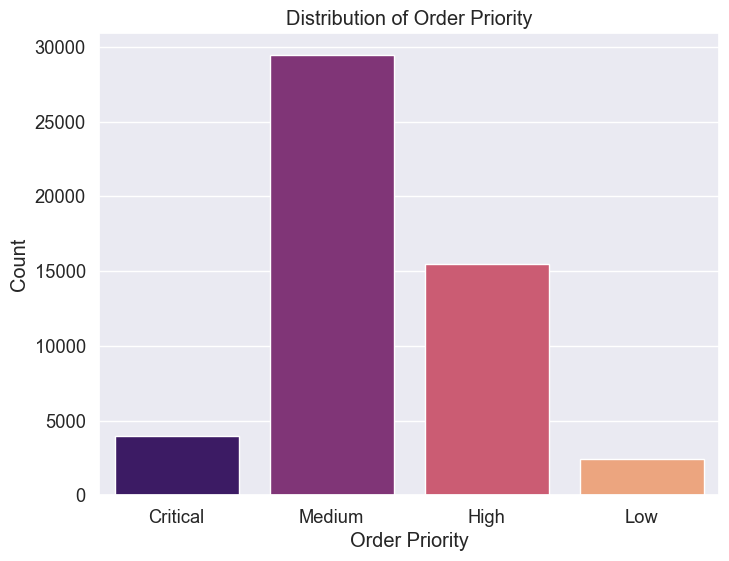

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Order Priority', data=sales_data, palette='magma')
plt.xlabel('Order Priority')
plt.ylabel('Count')
plt.title('Distribution of Order Priority')
plt.show()


***Now Lets derive some insights from this Dataset ***

In [85]:
sales_data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority'],
      dtype='object')

***Total Sales ***

In [86]:
total_sales = sales_data['Sales'].sum()
print("Total Sales:", total_sales)

Total Sales: 12642501.909880001


In [87]:
total_sales = round(sales_data['Sales'].sum(), 2)
print("Total Sales:", total_sales)


Total Sales: 12642501.91


**Total sales by category and subcategory**

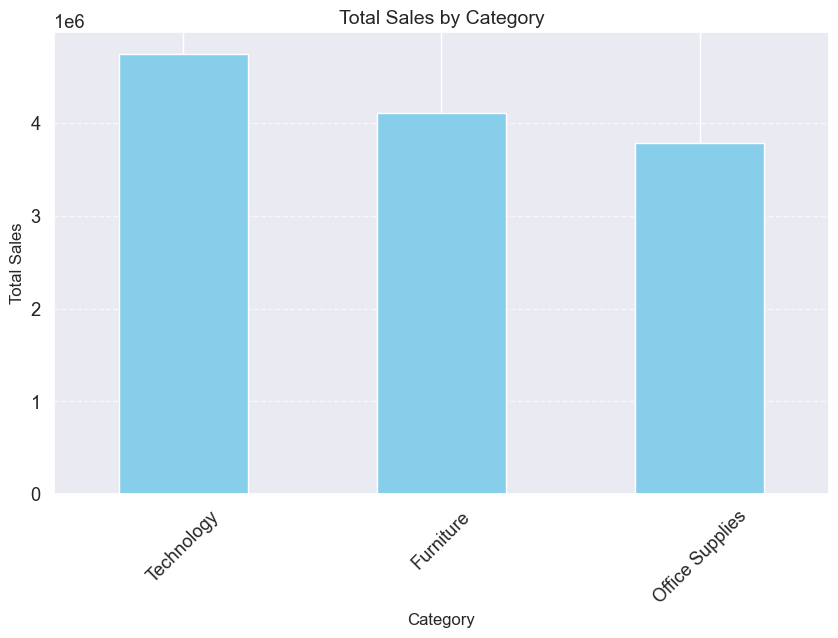

C:\Users\manoj\AppData\Local\Temp\ipykernel_10200\1847758147.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Sub-Category', data=total_sales_by_subcategory, palette='Blues_r')


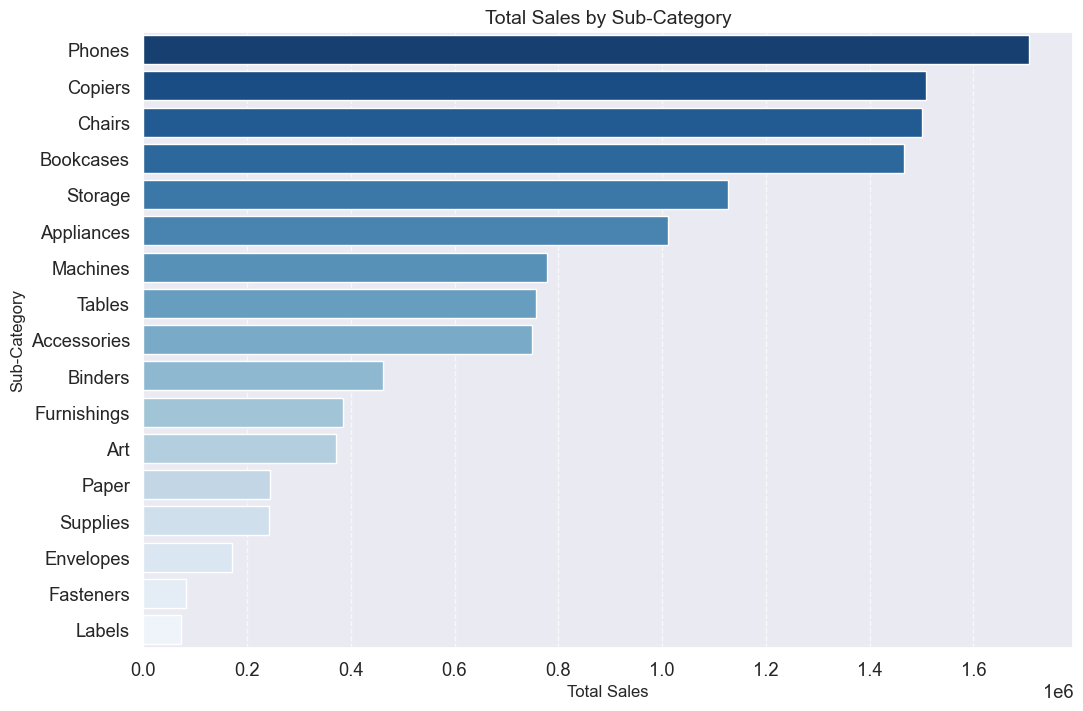

In [88]:
total_sales_by_category = sales_data.groupby('Category')['Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
total_sales_by_category.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
total_sales_by_subcategory = sales_data.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

total_sales_by_subcategory = total_sales_by_subcategory.sort_values(by='Sales', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Sales', y='Sub-Category', data=total_sales_by_subcategory, palette='Blues_r')
plt.title('Total Sales by Sub-Category', fontsize=14)
plt.xlabel('Total Sales', fontsize=12)
plt.ylabel('Sub-Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


**Total sales over time and Total sales by Region**

C:\Users\manoj\AppData\Local\Temp\ipykernel_10200\1083727085.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_sales_by_region.index, y=total_sales_by_region.values, ax=axes[1], palette='magma')


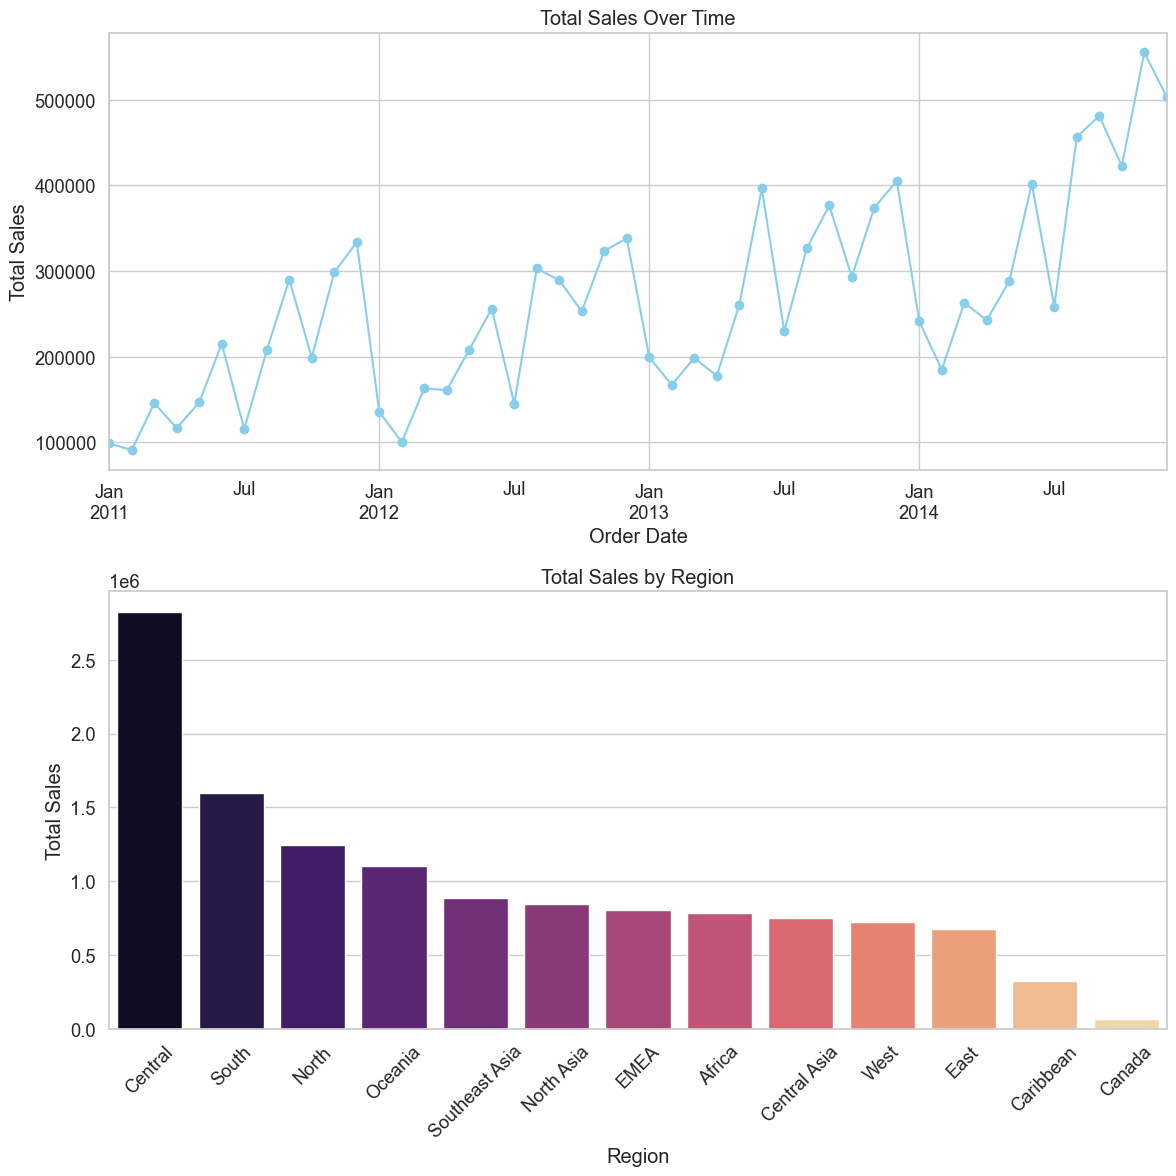

In [89]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 1, figsize=(12, 12))
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])  
total_sales_over_time = sales_data.groupby(sales_data['Order Date'].dt.to_period('M'))['Sales'].sum()
total_sales_over_time.plot(ax=axes[0], marker='o', color='skyblue')
axes[0].set_title('Total Sales Over Time')
axes[0].set_xlabel('Order Date')
axes[0].set_ylabel('Total Sales')

total_sales_by_region = sales_data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=total_sales_by_region.index, y=total_sales_by_region.values, ax=axes[1], palette='magma')
axes[1].set_title('Total Sales by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Total Sales')
axes[1].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()

**Total sales by Order Priority,Customer Segment and Market**

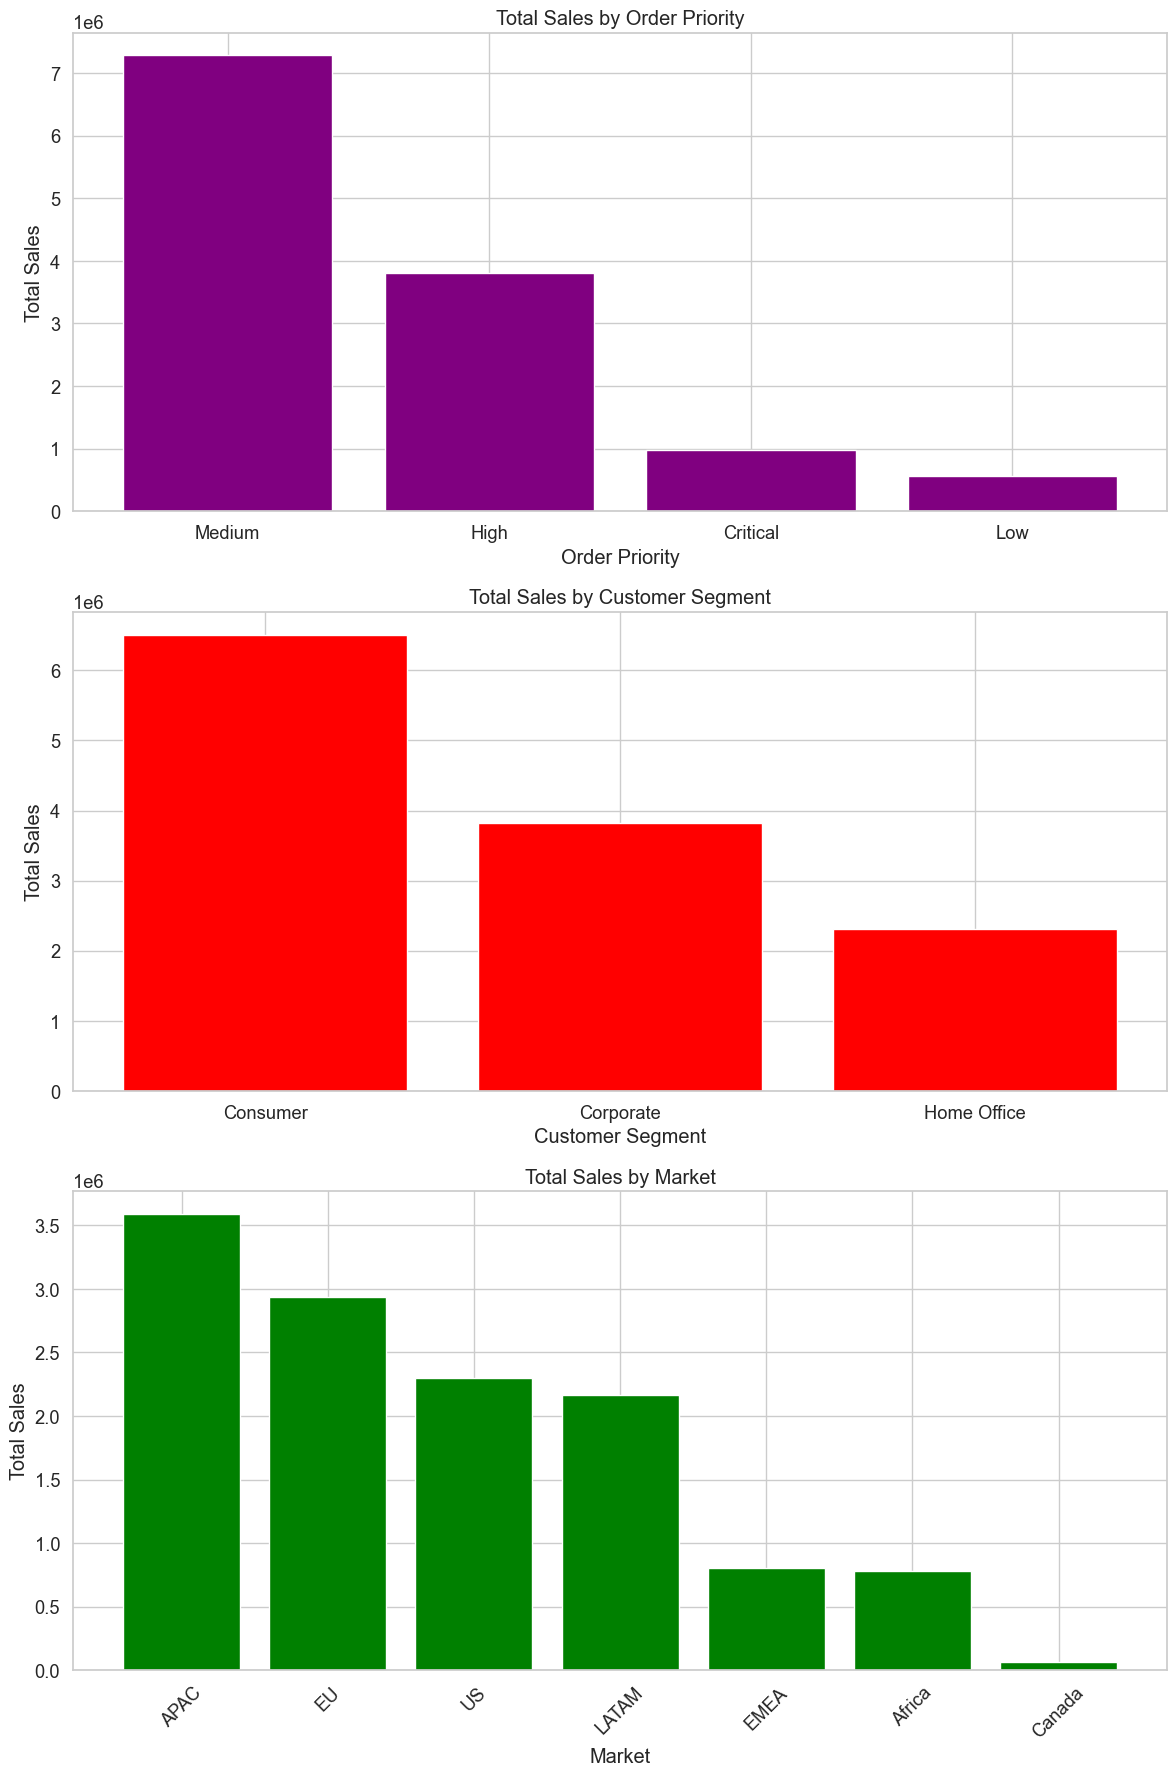

In [90]:
sns.set_style("whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

total_sales_by_order_priority = sales_data.groupby('Order Priority')['Sales'].sum().sort_values(ascending=False)
axes[0].bar(total_sales_by_order_priority.index, total_sales_by_order_priority.values, color='Purple')
axes[0].set_title('Total Sales by Order Priority')
axes[0].set_xlabel('Order Priority')
axes[0].set_ylabel('Total Sales')

total_sales_by_customer_segment = sales_data.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
axes[1].bar(total_sales_by_customer_segment.index, total_sales_by_customer_segment.values, color='Red')
axes[1].set_title('Total Sales by Customer Segment')
axes[1].set_xlabel('Customer Segment')
axes[1].set_ylabel('Total Sales')

total_sales_by_market = sales_data.groupby('Market')['Sales'].sum().sort_values(ascending=False)
axes[2].bar(total_sales_by_market.index, total_sales_by_market.values, color='green')
axes[2].set_title('Total Sales by Market')
axes[2].set_xlabel('Market')
axes[2].set_ylabel('Total Sales')
axes[2].tick_params(axis='x', rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()

**best-selling products**

In [91]:
total_sales_by_product = sales_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

best_selling_products = total_sales_by_product.head(10)

print("Top 10 Best-Selling Products:")
print(best_selling_products)

Top 10 Best-Selling Products:
Product Name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: Sales, dtype: float64


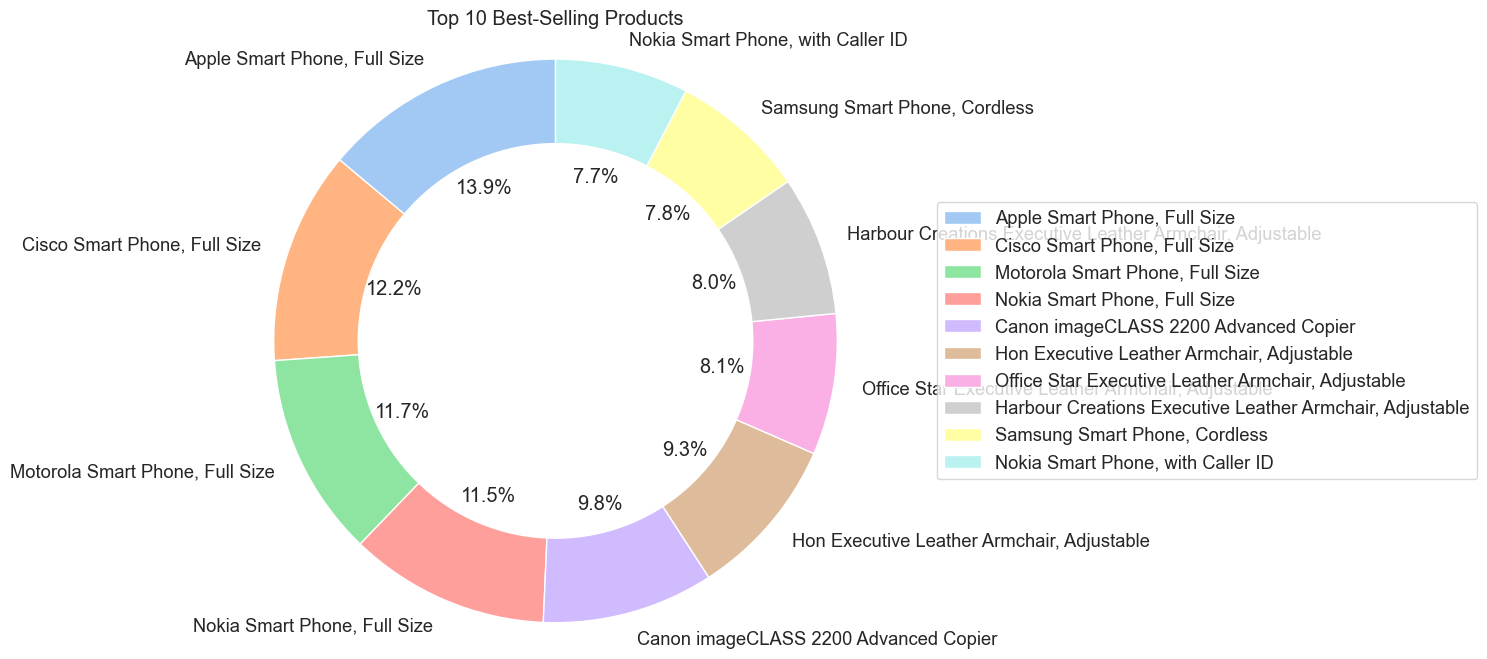

In [92]:
colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 8))
plt.pie(best_selling_products, labels=best_selling_products.index, colors=colors, autopct='%1.1f%%', startangle=90)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 10 Best-Selling Products')
plt.legend(loc="center left", bbox_to_anchor=(1.1, 0.5))

plt.axis('equal')
plt.show()


***Sales Data Analysis Report

The analysis of the provided sales dataset reveals several key insights into the business operations.

Data Overview: The dataset comprises various features including customer information, product details, sales figures, and shipping details.

Data Cleaning: Initial data exploration revealed missing values in the Postal Code column, which were imputed with the mode value.

Sales Distribution: The distribution of sales by category and sub-category suggests that Office Supplies constitute the majority of sales, with Binders being the top-selling sub-category.

Temporal Trends: Examining sales over time uncovered an overall increasing trend, with periodic fluctuations suggesting seasonality in sales. Regional analysis indicated that the East region consistently contributed the highest sales volume.

Customer Segmentation: Sales were further analyzed based on customer segments, revealing that the Corporate segment generates the highest revenue.

Market Analysis: The analysis of sales by market identified the APAC market as the most lucrative, highlighting potential areas for targeted marketing efforts.

Order Priority Impact: Interestingly, sales analysis by order priority indicated that orders with a priority of "Critical" contributed significantly to the overall revenue.

Best-Selling Products: The top-selling products were identified, indicating the popularity of certain items such as phones and chairs, which could inform inventory management and marketing strategies.

In conclusion, this comprehensive analysis provides valuable insights for strategic decision-making, including resource allocation, marketing strategies, and inventory management to optimize sales and maximize profitability. Further exploration and deeper analysis could uncover additional opportunities for business growth and efficiency.***